<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoUB.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Pràctica 1 - Greedy Algorithms </h2>
</center>
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from util import get_metro_graph, draw_metro_graph, get_path_subgraph

En esta práctica estudiaremos los algoritmos greedy, que se basan en seguir una heurística consistente en escoger la opción óptima en cada paso local con la esperanza de llegar a una solución general óptima.

El siguiente ejemplo ilustra un problema típico que podemos resolver de una forma óptima con una heurística. El problema se define por un conjunto de monedas S, y una cantidad K a la que queremos llegar con ese conjunto de monedas (__Cashier's Problem__). 

In [2]:
def cambio(importe):
    # Definimos el valor de los billetes y monedas disponibles: 500€, 200€, 100€...
    value = [50000,20000,10000,5000,2000,1000,500,200,100,50,20,10,5,2,1]
    
    # Creamos el array vacio para la solución
    distribucion = np.zeros(15).astype(int)
    
    importe = importe*100
    
    for i in range(15):
        # El numero de elementos de cada valor lo definimos con la división entera: importe/valor
        distribucion[i] = importe/value[i]
        # El importe acomulado pasa a ser el modulo de la división anterior
        importe %= value[i]
        
    return list(distribucion)

El algoritmo anterior, propuesto para un número infinito de monedas y billetes de cada tipo muestra como efectivamente, la decisión que tomamos en cada paso del algoritmo pertenece a la solución del problema.

In [3]:
def fancyprint(arr):
    assert type(arr) == list and len(arr) == 15
    curr = ["billete<s> de 500€","billete<s> de 200€","billete<s> de 100€","billete<s> de 50€","billete<s> de 20€",
        "billete<s> de 10€","billete<s> de 5€","moneda<s> de 2€","moneda<s> de 1€","moneda<s> de 50cts",
        "moneda<s> de 20cts","moneda<s> de 10cts","moneda<s> de 5cts","moneda<s> de 2cts","moneda<s> de 1cts"]
    for i in range(len(arr)):
        if arr[i] == 0:
            continue
        if arr[i] == 1:print "- ", arr[i], curr[i].replace("<s>", "")
        else: print "- ", arr[i], curr[i].replace("<s>", "s")
            
fancyprint(cambio(991.35))

-  1 billete de 500€
-  2 billetes de 200€
-  1 billete de 50€
-  2 billetes de 20€
-  1 moneda de 1€
-  1 moneda de 20cts
-  1 moneda de 10cts
-  1 moneda de 5cts


<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>




<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Calculador de horarios</p></h2>
  
  <div class="row">
  <div class="col-sm-9">
  <p style="text-align: justify; padding-right: 30px">
  En este ejercicio nos disponemos a elaborar los horarios de los conductores de metro. Supongamos que los periodos de trabajo son de <b>35'</b>, <b>20'</b>, <b>15'</b> y <b>30'</b> durante las dos horas de hora punta y que el tiempo mínimo de descanso entre periodo y periodo es de <b>5'</b>.
  </p>
    <p style="text-align: justify; padding-right: 30px">
  Al final de la ejecución del programa querremos saber cuánto tiempo han estado los trenes parados (Es decir, cuanto tiempo ha pasado un tren sin conductor) y cuantos periodos de los conductores han quedado sin usar. 
  </p>
  </div>
  <div class="col-sm-3">
  <img src="img/work.jpg"></img>
  </div>



<div class="alert alert-warning" style="width:90%; margin:0 auto;">
    <h2><p>Ejemplo de ejecución</p></h2>

    <div class="row">
        <div class="col-sm-5">
            <p style="text-align: justify; padding-right: 30px">
                (1) Iniciamos la ejecución del código con la lista de los periodos pendientes en cada uno de los conductores llena. 
            </p>
        </div>
        <div class="col-sm-7">
            <img src="img/0.png"></img>
        </div>
    </div>
    <div class="row" style="padding-top:30px;">
        <div class="col-sm-5">
            <p style="text-align: justify; padding-right: 30px">
                (2) Añadimos driver1 a train1 por un periodo de 15' y a driver2 a train2 por un periodo de 20'
            </p>
        </div>
        <div class="col-sm-7">
            <img src="img/1.png"></img>
        </div>
    </div>
    <div class="row" style="padding-top:30px;">
        <div class="col-sm-5">
            <p style="text-align: justify; padding-right: 30px">
                (3) Cuando driver1 acaba su periodo en train1 no hay ningún conductor disponible para ocupar su posición, así que tenemos que esperar los 5' del periodo de descanso y luego volvemos a añadir driver1 a train1
            </p>
        </div>
        <div class="col-sm-7">
            <img src="img/3.png"></img>
        </div>
    </div>
    <div class="row" style="padding-top:30px;">
        <div class="col-sm-5">
            <p style="text-align: justify; padding-right: 30px">
                (N) A lo largo de las N iteraciones vamos colocando el conductor libre en el tren libre durante un periodo de tiempo determinado, respetando los periodos de descanso. Cuando hemos acabado tenemos que: 
                <ul>
                <li>**perdida_trenes = 20'** (5'+5'+5'+5')</li>
                <li>**perdida_conductores = 65'** (30'+35')</li>
                </ul>
            </p>
        </div>
        <div class="col-sm-7">
            <img src="img/5.png"></img>
        </div>
    </div>

</div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__ntrenes__: El numero de trenes.</li>
<li>__mconductores__: El numero de conductores.</li>
<li>__periodos (opt)__: Lista con los periodos definidos en el enunciado.</li>
<li>__descanso (opt)__: Tiempo mínimo de descanso entre periodo y periodo de trabajo.</li>
<li>__tiempo (opt)__: El tiempo total en el que deben de estar en marcha los trenes.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una función es una tupla que contendrá los valores *( (**int**) perdida_trenes, (**int**) perdida_conductores)* en los cuales cuantificaremos, al final de la ejecución del algoritmo, el tiempo en el que un tren ha estado parado (*perdida_trenes*) y el tiempo que no hemos usado de los conductores (*perdida_conductores*). 

</p>

</div>

In [165]:
def calculador_horarios(ntrenes, 
                        mconductores, 
                        periodos=[15,20,30,35],
                        descanso=5,
                        tiempo=120):
    
    tiempoMuertoT= 0
    tiempoMuertoC= 0
    final = False
    elem = periodos.pop() #Este será el primero de los periodos que iteraremos, lo haremos de mayor a menor
    #he supuesto que siempre estarán ordenados de mayor a menor
    
    nCon= 0
    #inicializamos nCon y nTren que serán nuestros punteros durante la iteración
    listaT = []
    #y creamos la lista de trenes, cada tren con su indice y todos con un valor inicial de 0
    for o in range(ntrenes):
        listaT.append(0)
    nTren = 0 
    
        
    while not final: #mientras nuestro boolean no sea true:
        #Si el primer tren tiene espacio para el elemento y su respectivo descanso:
        if ((tiempo - listaT[nTren])>= (elem + descanso)):
            #Se suve el valor de este tren
            listaT[nTren] += elem + descanso
            #Y se aumenta el valor de los descansos que devolveremos
            tiempoMuertoT += descanso
        elif ((tiempo - listaT[nTren]) >=elem): 
            #si lo unico que cabe es el ultimo viaje en la jornada del trabajador...
            listaT[nTren] += elem
            #simplemente se suma la jornada.
        else:
            #si ninguno de los casos anteriores es factible quiere decir que los trenes ya han cumplido su
            #tiemo, o que el horario del trabajador es excesivo para el tiempo del tren, por lo tanto este
            #tiempo no nos es util, y lo guardamos en el valor que devolveremos
            tiempoMuertoC+=elem
        #sumamos nuestros punteros
        nCon +=1
        nTren +=1
        #si el puntero del tren llega a su maximo lo volveremos a poner en su posición inicial para poder
        #iterar sobre todos ellos
        if nTren >= ntrenes:
            nTren = 0
            
        #pero con el de los trabajadores funciona distinto, si ha llegado al maximo quiere decir que esa jornada de
        #trabajo, ya se ha repartido entre todos los trabajadores, por lo tanto:
        if nCon >= mconductores:
            if periodos:
                elem = periodos.pop() #si existe una jornada mas por repartir, se subsituirá por elem
                nCon = 0 #y se iterará por todos los trabajadores de nuevo
            else:
                final = True #si no hay más jornadas, significa que hemos acabado
                
        #También habremos acabado si todos los trenes han cumplido su trabajo, y esta iteración comprueba eso,
        suma = 0
        for i in listaT: 
            if i == 120:
                suma+=1
        if suma == ntrenes:
            final = True
        
    return (tiempoMuertoT, tiempoMuertoC)
    
calculador_horarios(1000, 
                    20000000, 
                    periodos=[15,20,30,35],
                    descanso=5,
                    tiempo=120)

#siendo N trenes, K el numero de periodos y P conductores la complejidad es: O((P*K)*N)

(15000, 0)

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> 

</div>

### En esta sección debéis responder a las preguntas siguientes:
#### 1. ¿Cómo habéis implementado la función?
#### 2. ¿En que configuración de _ntrenes_ y _mconductores_ obtenéis mejores resultados?
#### 3. Análisis de complejidad de vuestra implementación
#### 4. _(Opcional)_ Comentarios extra y pruebas realizadas con otras configuraciones de periodos, descanso y tiempo.

## (Podéis contestar las preguntas en este mismo bloque)


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>2- Calculador de ruta</p></h2>
  
  <div class="row">
  <div class="col-sm-9">
  <p style="text-align: justify; padding-right: 30px">
  Ahora queremos volver a calcular el camino mínimo entre dos estaciones de metro utilizando un algoritmo voraz. La restricción en este caso es que cualquier nodo que visitemos tendrá que formar parte del camino final, así que tendremos que definir una política que nos permita escoger el "mejor" vecino del nodo actual.
  </p>
    <p style="text-align: justify; padding-right: 30px">
Para la realización de este ejercicio se ha modificado la definición de las estaciones añadiendo la geolocalización de cada una de ellas como atributos de los nodos.
  </p>
  </div>
  <div class="col-sm-3">
  <img src="img/plano.jpg"></img>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta práctica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto te tipo _networkx.Graph_.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso, como indexamos los nodos con el nombre de las paradas de Metro, deberá ser un String _(e.g. 'Tetuan')_.</li>
<li>__destino__: El índice del nodo al que queremos llegar.</li>
<li>... : Podéis añadir más parámetros opcionales en el caso que los necesitéis</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una función es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'distance'_ __: La distancia acumulada a lo largo del trayecto
<ul>

</p>

</div>

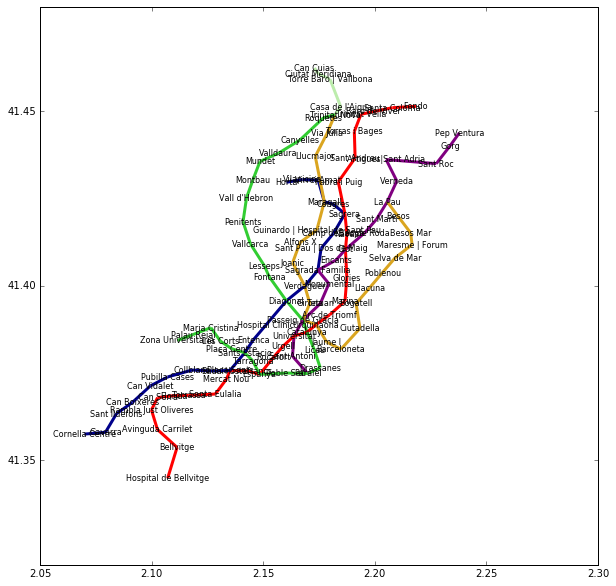

In [5]:
# Carga del fichero CSV con los datos
G = get_metro_graph('csv/lineasmetro.csv')
draw_metro_graph(G, figsize=(10,10))

In [167]:
def calculador_ruta(G, inicio, destino):
    camino = [inicio,[inicio],0]
    visitados = []
    latF = G.node[destino]['latitud']
    lonF = G.node[destino]['longitud']
    
    lineaFinal = []
    for k in G.neighbors(destino):
        lineaFinal.append(G[destino][k]['line'])
    #Guardamos las lineas (puede ser que sea un cruze) en las que se encuentra el destino para saber si vamos bien
    #encaminados para encontrar el final.
    
    
    while camino[0] != destino: #mientras no encontremos el destino (o el nodo no exista, como el caso del string que añado en definitivo)
        if not camino[0] in visitados: #comprovamos solo los que no hayamos visitado
            visitados.append(camino[0])
            definitivo = 'No se ha encontrado'
            valorDef = 0
            for nod in G.neighbors(camino[0]):
                if not nod in visitados:#Elegimos el mejor candidato con la funcion 'pedroMetro' entre los vecinos
                    val = pedroMetro(G,camino[0],nod,latF,lonF,lineaFinal,G[camino[0]][nod]['line'])
                    if  val >= valorDef: #si es mayor, o igual (para evitar que 'definitivo' se quede vacío)
                        definitivo = nod #tenemos nuevo candidato
                        valorDef = val
            camino = [definitivo, camino[1]+[definitivo] , camino[2] + (int(G[camino[0]][definitivo]['distance']))]
            #al final de cada iteración actualizamos el nodo de la nueva posivilidad, si este da 'no se ha encontrado'
            #hemos llegado a un callejon sin salida y este greedy no tendrá solución
                
    return {
        'path': camino[1],
        'distance': camino[2]
    }


def pedroMetro(G,inicio,destino,latF,lonF,lineaFinal,linea):
    latI = G.node[inicio]['latitud']
    lonI = G.node[inicio]['longitud']
    latD = G.node[destino]['latitud']
    lonD = G.node[destino]['longitud']
    pedroM = 0
    #inicializamos en 0, y le sumamos el valor de la distancia por la diferencia entre el destino y el incial
    #en caso de que el destino se encuentre entre el final y el inicial.
    if ((latI < latD<= latF) or (latI > latD >= latF)):
        pedroM +=  (float(G[inicio][destino]['distance'])) * (abs(latD-latI))
    if ((lonI < lonD <= lonF) or (lonI > lonD >= lonF)):
        pedroM +=  (float(G[inicio][destino]['distance'])) * (abs(lonD-lonI))
    if linea in lineaFinal: #He considerado que si encuentra la linea en la que está el final
        #esta será maxima prioridad.
        pedroM = pedroM * 9000
    return pedroM

    
print calculador_ruta(G, 'Canyelles', 'Maria Cristina')

#Siendo P vecinos de los nodos que recorremos y N los nodos la complejidad es: O(N*P)
#En este caso no tengo en cuenta que N sea igual que P porque los nodos que recorremos será siempre más reducido que
#los vecinos que comprovamos para elegir la mejor opción.

{'path': ['Canyelles', 'Valldaura', 'Mundet', 'Montbau', "Vall d'Hebron", 'Penitents', 'Vallcarca', 'Lesseps', 'Fontana', 'Diagonal', 'Passeig de Gracia', 'Universitat', 'Urgell', 'Rocafort', 'Espanya', 'Tarragona', 'Sants Estacio', 'Placa Centre', 'Les Corts', 'Maria Cristina'], 'distance': 12820712}


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> </div>

### En esta sección debéis responder a las preguntas siguientes:
#### 1. ¿Cómo habéis implementado la función?
#### 2. ¿La solución retorna un camino óptimo?
#### 3. Análisis de complejidad de vuestra implementación
#### 4. _(Opcional)_ Comentarios extra y pruebas de optimalidad/eficiencia realizadas contra BFS o Dijkstra

## (Podéis contestar las preguntas en este mismo bloque)

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica tiene como fecha límite el **domingo, 13 de noviembre de 2016 a las 23:55**. En el campus virtual deberéis subir este fichero con las funciones implementadas y las secciones de comentarios debidamente rellenadas. Si queréis también podéis añadir tests extras que den soporte a los comentarios realizados.
</p>

<p>
Este fichero es la parte 2/2 de la práctica, correspondiente a algoritmos greedy.
</p>